In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from dataloader.dataloader import DataLoader

In [6]:
print('\nLoading data...')
data = pd.read_excel('data\merged_data.xlsx')
data = data.drop(['ID','Sample','Old','Label Old','Type of Episode','FEP','Label', 'Label New'], axis=1)
target_labels = ['CTR'] 
x = data.drop(['new'], axis=1).reset_index(drop=True)
y = (data['new'].isin(target_labels)).astype(int).reset_index(drop=True)
y = 1 - y

print('\nPre-processing data...')
x_scaled = DataLoader.pre_process_data(x)

print('label y shape:', y.shape)
print('data x shape:', x_scaled.shape)


Loading data...

Pre-processing data...
label y shape: (78,)
data x shape: (78, 2302)


# Best parameters

SVM


Starting grid search...
Run 1/10
Run 2/10
Run 3/10
Run 4/10
Run 5/10
Run 6/10
Run 7/10
Run 8/10
Run 9/10
Run 10/10
Parameters for the best mean F1 score: {'C': 1000.0, 'gamma': 1e-05}
Best mean F1 score: 0.929998175515417


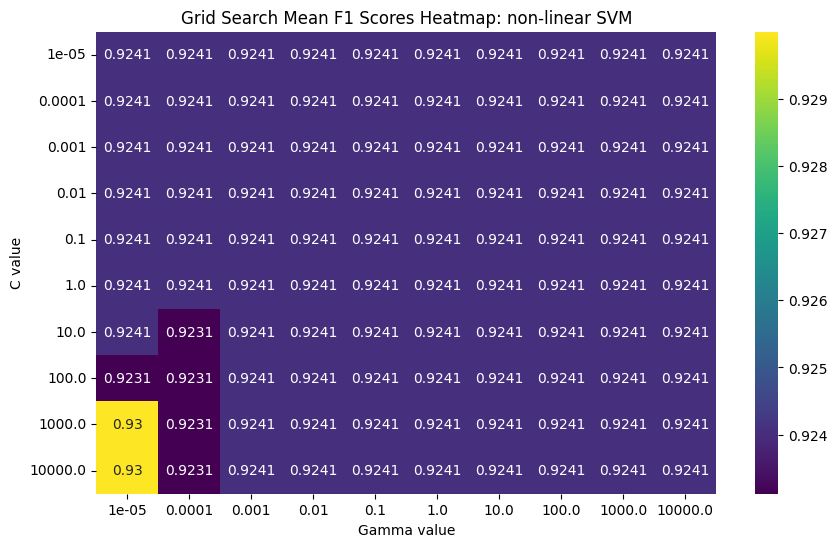

In [8]:

# Define the ranges
parameter1 = np.logspace(-5, 4, 10) # C
parameter2 = np.logspace(-5, 4, 10) # gamma

sum_f1_scores_matrix = np.zeros((len(parameter1), len(parameter2)))
best_params = None
best_mean_f1_score = 0

# Stratified k-fold cross-validation with k=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nStarting grid search...")
for run in range(10):
    print(f"Run {run + 1}/10")
    for i, p1 in enumerate(parameter1):
        for j, p2 in enumerate(parameter2):
            param_grid = {'C': [p1], 'gamma': [p2], 'kernel': ['rbf']}
            grid = GridSearchCV(SVC(), param_grid, cv=cv, scoring='f1')
            grid.fit(x_scaled, y)
            f1_score = grid.best_score_
            sum_f1_scores_matrix[i][j] += f1_score

mean_f1_scores_matrix = sum_f1_scores_matrix / 10

# Find the indices of the maximum value in the matrix
best_indices = np.unravel_index(np.argmax(mean_f1_scores_matrix, axis=None), mean_f1_scores_matrix.shape)
best_params = {'C': parameter1[best_indices[0]], 'gamma': parameter2[best_indices[1]]}
best_mean_f1_score = mean_f1_scores_matrix[best_indices]

print("Parameters for the best mean F1 score:", best_params)
print("Best mean F1 score:", best_mean_f1_score)

plt.figure(figsize=(10, 6))
sns.heatmap(mean_f1_scores_matrix, annot=True, fmt='.4g', cmap='viridis', xticklabels=parameter2, yticklabels=parameter1)
plt.xlabel('Gamma value')
plt.ylabel('C value')
plt.title('Grid Search Mean F1 Scores Heatmap: non-linear SVM')
plt.show()

Random forest


Starting grid search...
Run 1/10
Run 2/10
Run 3/10
Run 4/10
Run 5/10
Run 6/10
Run 7/10
Run 8/10
Run 9/10
Run 10/10
Parameters for the best mean F1 score: {'max_depth': 1, 'n_estimators': 15}
Best mean F1 score: 0.9233366174055829


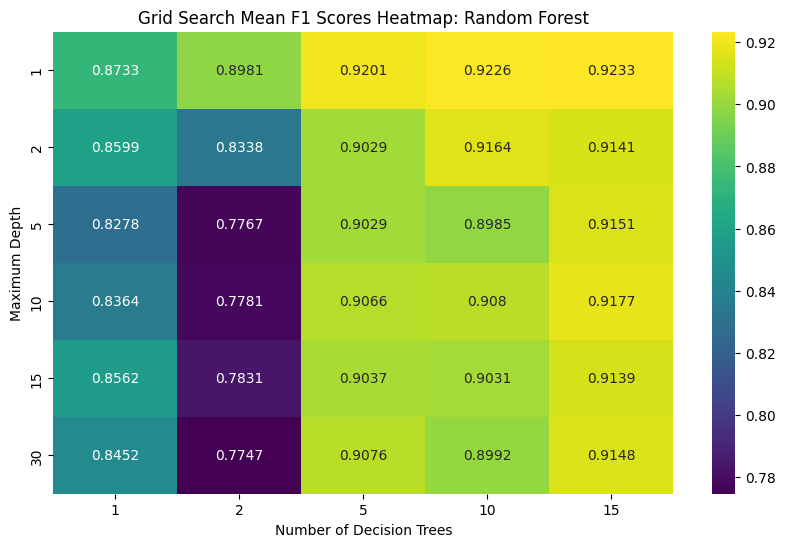

In [9]:

# Define the ranges
parameter1 = [1, 2, 5, 10, 15, 30] # max depth
parameter2 =  [1, 2, 5, 10, 15]    # decision trees

sum_f1_scores_matrix = np.zeros((len(parameter1), len(parameter2)))
best_params = None
best_mean_f1_score = 0

# Stratified k-fold cross-validation with k=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nStarting grid search...")
for run in range(10):
    print(f"Run {run + 1}/10")
    for i, p1 in enumerate(parameter1):
        for j, p2 in enumerate(parameter2):
            param_grid = {'max_depth': [p1], 'n_estimators': [p2]}
            grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=cv, scoring='f1')
            grid.fit(x_scaled, y)
            f1_score = grid.best_score_
            sum_f1_scores_matrix[i][j] += f1_score

mean_f1_scores_matrix = sum_f1_scores_matrix / 10

# Find the indices of the maximum value in the matrix
best_indices = np.unravel_index(np.argmax(mean_f1_scores_matrix, axis=None), mean_f1_scores_matrix.shape)
best_params = {'max_depth': parameter1[best_indices[0]], 'n_estimators': parameter2[best_indices[1]]}
best_mean_f1_score = mean_f1_scores_matrix[best_indices]

print("Parameters for the best mean F1 score:", best_params)
print("Best mean F1 score:", best_mean_f1_score)

plt.figure(figsize=(10, 6))
sns.heatmap(mean_f1_scores_matrix, annot=True, fmt='.4g', cmap='viridis', xticklabels=parameter2, yticklabels=parameter1)
plt.xlabel('Number of Decision Trees')
plt.ylabel('Maximum Depth')
plt.title('Grid Search Mean F1 Scores Heatmap: Random Forest')
plt.show()

Adam Booster


Starting grid search...
Run 1/10
Run 2/10
Run 3/10
Run 4/10
Run 5/10
Run 6/10
Run 7/10
Run 8/10
Run 9/10
Run 10/10
Parameters for the best mean F1 score: {'n_estimators': 10, 'learning_rate': 1.0}
Best mean F1 score: 0.9197862265448473


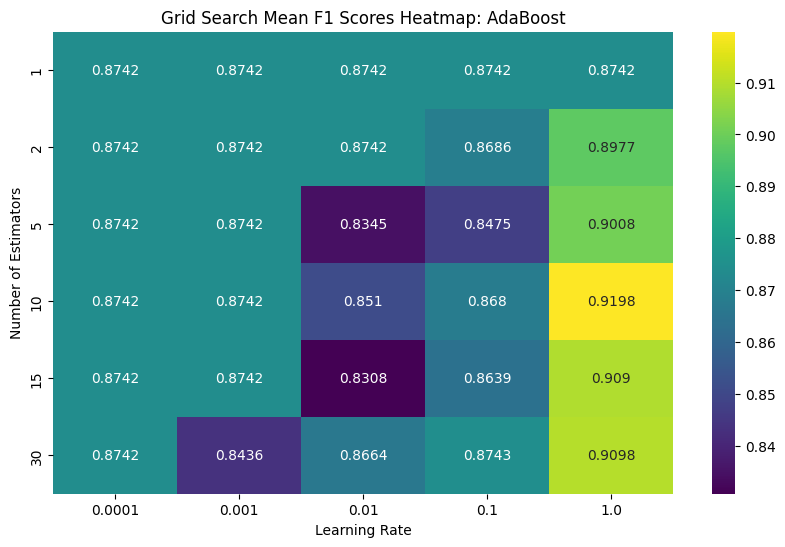

In [10]:

# Define the ranges
parameter1 = [1, 2, 5, 10, 15, 30]      # n estimators
parameter2 = [0.0001, 0.001, 0.01, 0.1, 1.0]  # learning rate

sum_f1_scores_matrix = np.zeros((len(parameter1), len(parameter2)))
best_params = None
best_mean_f1_score = 0

# Stratified k-fold cross-validation with k=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nStarting grid search...")
for run in range(10):
    print(f"Run {run + 1}/10")
    for i, p1 in enumerate(parameter1):
        for j, p2 in enumerate(parameter2):
            param_grid = {'n_estimators': [p1], 'learning_rate': [p2]}
            grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=cv, scoring='f1')
            grid.fit(x_scaled, y)
            f1_score = grid.best_score_
            sum_f1_scores_matrix[i][j] += f1_score

mean_f1_scores_matrix = sum_f1_scores_matrix / 10

# Find the indices of the maximum value in the matrix
best_indices = np.unravel_index(np.argmax(mean_f1_scores_matrix, axis=None), mean_f1_scores_matrix.shape)
best_params = {'n_estimators': parameter1[best_indices[0]], 'learning_rate': parameter2[best_indices[1]]}
best_mean_f1_score = mean_f1_scores_matrix[best_indices]

print("Parameters for the best mean F1 score:", best_params)
print("Best mean F1 score:", best_mean_f1_score)

plt.figure(figsize=(10, 6))
sns.heatmap(mean_f1_scores_matrix, annot=True, fmt='.4g', cmap='viridis', xticklabels=parameter2, yticklabels=parameter1)
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.title('Grid Search Mean F1 Scores Heatmap: AdaBoost')
plt.show()

KNN


Starting grid search...
Run 1/10
Run 2/10
Run 3/10
Run 4/10
Run 5/10
Run 6/10
Run 7/10
Run 8/10
Run 9/10
Run 10/10


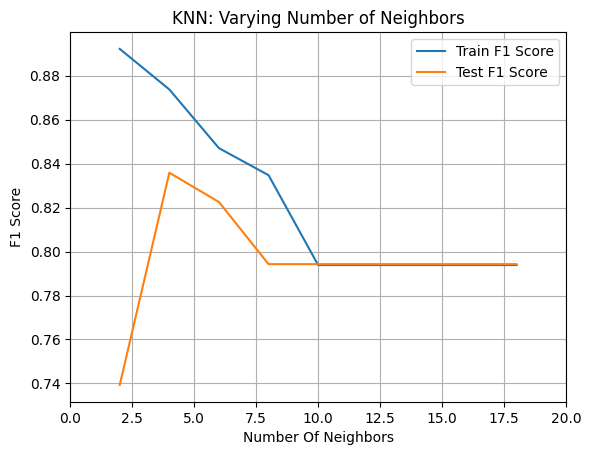

Number of Neighbors with the best test F1 score: 4


In [16]:
# Define the range for number of neighbors
n_neighbors = np.arange(2, 20, 2)

# Initialize dictionaries to store F1 scores
f1_train_scores = {neighbor: [] for neighbor in n_neighbors}
f1_test_scores = {neighbor: [] for neighbor in n_neighbors}

# Stratified k-fold cross-validation with k=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nStarting grid search...")
for run in range(10):
    print(f"Run {run + 1}/10")
    for neighbor in n_neighbors:
        train_f1_scores = []
        test_f1_scores = []
        for train_index, test_index in cv.split(x_scaled, y):
            X_train, X_test = x_scaled[train_index], x_scaled[test_index]
            y_train, y_test = y[train_index], y[test_index]

            knn = KNeighborsClassifier(n_neighbors=neighbor)
            knn.fit(X_train, y_train)
            train_pred = knn.predict(X_train)
            test_pred = knn.predict(X_test)
            train_f1_scores.append(f1_score(y_train, train_pred, average='weighted'))
            test_f1_scores.append(f1_score(y_test, test_pred, average='weighted'))

        f1_train_scores[neighbor].append(np.mean(train_f1_scores))
        f1_test_scores[neighbor].append(np.mean(test_f1_scores))

# Average the F1 scores over 10 runs
avg_f1_train_scores = {neighbor: np.mean(scores) for neighbor, scores in f1_train_scores.items()}
avg_f1_test_scores = {neighbor: np.mean(scores) for neighbor, scores in f1_test_scores.items()}

plt.plot(n_neighbors, list(avg_f1_train_scores.values()), label="Train F1 Score")
plt.plot(n_neighbors, list(avg_f1_test_scores.values()), label="Test F1 Score")
plt.xlabel("Number Of Neighbors")
plt.ylabel("F1 Score")
plt.title("KNN: Varying Number of Neighbors")
plt.legend()
plt.xlim(0, 20)  # Adjust the limit as per your requirements
plt.grid()
plt.show()

# Identify the key corresponding to the maximum test F1 score
max_test_f1_score_key = max(avg_f1_test_scores, key=avg_f1_test_scores.get)
print("Number of Neighbors with the best test F1 score:", max_test_f1_score_key)


In [13]:

parameter={'n_neighbors': np.arange(2, 20, 2)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=sss, verbose=1)
knn_cv.fit(X_train_std, y_train)
print(knn_cv.best_params_)

y_pred = knn_cv.predict(X_test_std)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 score: {f1}")

NameError: name 'sss' is not defined